## Using features  : minutes_remaining , period

In [113]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('../data.csv')
display(kobe_data.head(10))

full_features = [kobe_data.columns]
# print(full_features)


# Target List (this is our y)
target = ['shot_made_flag']


# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['minutes_remaining','period']

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target]
# display(y.head(10))


# Data with all prediction data dropped (so that we don't learn from it)
X = kobe_data[feature_cols].dropna()
display(X.head(10))

# final = merged.drop(OHE_features, axis='columns')
# final_features = [final.columns]
# display(final.head(10))

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))


# X = final.dropna(subset=target)
# display(X.head(10))

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

k=3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


,minutes_remaining,period
0,10,1
1,10,1
2,7,1
3,6,1
4,6,2
5,9,3
6,8,3
7,8,3
8,6,3
9,3,3


,shot_made_flag
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False


(30697, 2)
(30697, 1)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.7591823438390748


In [63]:
scores = []
k_list = [i for i in range(1,20)]


for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

print(scores)



[0.5387683626811947, 0.5607549372507054, 0.5527775075396439, 0.5694133670590524, 0.5560852222978889, 0.5775853682264812, 0.5636735090962156, 0.5768070824010118, 0.5653273664753381, 0.5780717968673995, 0.5721373674481953, 0.5774880824982975, 0.5691215098745014, 0.5783636540519506, 0.5738885105555015, 0.5809903687129098, 0.5782663683237669, 0.5844926549275221, 0.5806985115283588]


Text(0, 0.5, 'Testing Accuracy')

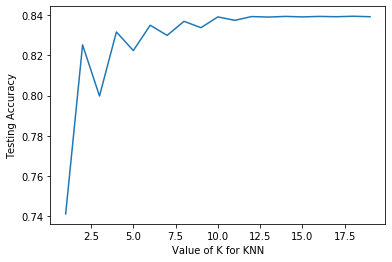

In [114]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_list, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Using features loc_x	, loc_y	

In [112]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('../data.csv')
# display(kobe_data.head(10))

full_features = [kobe_data.columns]
# print(full_features)


# Target List (this is our y)
target = ['shot_made_flag']


# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['loc_x','loc_y']

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target]
# display(y.head(10))


# Data with all prediction data dropped (so that we don't learn from it)
X = kobe_data[feature_cols].dropna()
display(X.head(10))

# final = merged.drop(OHE_features, axis='columns')
# final_features = [final.columns]
# display(final.head(10))

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))


# X = final.dropna(subset=target)
# display(X.head(10))

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

scores = []
k_list = [i for i in range(1,20)]


for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

print(scores)





,loc_x,loc_y
0,167,72
1,-157,0
2,-101,135
3,138,175
4,0,0
5,-145,-11
6,0,0
7,1,28
8,-65,108
9,-33,125


,shot_made_flag
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False


(30697, 2)
(30697, 1)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.7410212558025898


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DataConversionWarning: A column-vector y was p

[0.7410212558025898, 0.825230067595081, 0.7997393924586693, 0.8316638162716834, 0.8223796726117762, 0.8350028503949833, 0.8299535792817004, 0.8369574069549638, 0.8337812525449955, 0.8391562830849417, 0.8374460460949589, 0.8393191627982735, 0.839074843228276, 0.8394006026549393, 0.8391562830849417, 0.8394006026549393, 0.8392377229416076, 0.8394820425116052, 0.8392377229416076]


## Using features : period , minutes remaining


In [110]:
import numpy as np
import pandas as pd

kobe_data = pd.read_csv('../data.csv')
# display(kobe_data.head(10))

full_features = [kobe_data.columns]
# print(full_features)


# Target List (this is our y)
target = ['shot_made_flag']


# Features that we will not be using.
unused_features = ['team_name', 'team_id', 'matchup', 'game_event_id', 'game_id', 'shot_id', 'season', 'game_date']
removed_features = unused_features

feature_cols = ['period','minutes_remaining']

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target]
# display(y.head(10))


# Data with all prediction data dropped (so that we don't learn from it)
X = kobe_data[feature_cols].dropna()
display(X.head(10))

# final = merged.drop(OHE_features, axis='columns')
# final_features = [final.columns]
# display(final.head(10))

# Data frame but with the prediction rwos removed (rows with a Nan value in the target column)
y = pd.DataFrame()
y = kobe_data[target].isnull()
display(y.head(10))


# X = final.dropna(subset=target)
# display(X.head(10))

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)





,period,minutes_remaining
0,1,10
1,1,10
2,1,7
3,1,6
4,2,6
5,3,9
6,3,8
7,3,8
8,3,6
9,3,3


,shot_made_flag
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,True
8,False
9,False


(30697, 2)
(30697, 1)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.7963189184787035
